# COMP 381 Final Project
Henry Nguyen
June 19 2018

## Dataset
### Mobile App Store statistics (Apple iOS)
> I will be using a dataset containing statistics from Apple's iOS store.
<br> Link: [Apple app store data set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/version/5)

> Some machine learning tasks I plan to apply to the data are:
 * Cross fold validation to evaluate predictive models.
 * Lasso as regularization method and feature subset selection.
 * Univariate linear regression and multivariate linear regression to see some general trends.
 * Evaluation metrics: confusion matrix and/or area under curve for classification; MSE or R^2 for regression.
 

1. <a href='#Introduction'>Introduction</a>
<br><br>
2. <a href='#Import'>Imported Libraries</a>
<br><br>
3. <a href='#Data'>Exploring the dataset</a>
    * <a href='#Loading'>Loading and summarizing the dataset</a>
    * <a href='#Describe'>Count, mean, std, minimum, maximum, and percentiles </a>
    * <a href='#Sets'>Training and Test sets</a>
    <br><br>
4. <a href='#Regression'>Regression</a>
    * <a href='#Univariate'>Univariate Linear Regression</a>
    * <a href='#Multivariate'>Multivariate Linear Regression</a>
    <br><br>
5. <a href='#Feature'>Feature Selection</a>
    * <a href='#Subset'>Feature Subset Selection</a>
    * <a href='#Lasso'>Least Absolute Shrinkage and Selection Operator</a>
     <br><br>
6. <a href='#Conclusion'>Conclusion</a>

<a id='Introduction'></a>
## Introduction

<p> "The ever-changing mobile landscape is a challenging space to navigate. . The percentage of mobile over desktop is only increasing. Android holds about 53.2% of the smartphone market, while iOS is 43%. To get more people to download your app, you need to make sure they can easily find your app. Mobile app analytics is a great way to understand the existing strategy to drive growth and retention of future user.

With million of apps around nowadays, the following data set has become very key to getting top trending apps in iOS app store. This data set contains more than 7000 Apple iOS mobile application details. The data was extracted from the iTunes Search API at the Apple Inc website. R and linux web scraping tools were used for this study.

Dimension of the data set; 7197 rows and 16 columns" </p>
    

<a id='Import'></a>
## Importing Libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, precision_recall_fscore_support, accuracy_score



<a id='Data'></a>
## Exploring the data


<p> I will be using a dataset containing statistics from Apple's iOS store. </p>
<br> Link: [Apple app store data set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/version/5)

There are 16 features contained in the appleStore.csv: 
    
       1.  "id" : App ID

       2. "track_name": App Name

       3. "size_bytes": Size (in Bytes)

       4. "currency": Currency Type

       5. "price": Price amount

       6. "rating_count_tot": User Rating counts (for all version)

       7. "rating_count_ver": User Rating counts (for current version)

       8. "user_rating" : Average User Rating value (for all version)

       9. "user_rating_ver": Average User Rating value (for current version)

       10. "ver" : Latest version code

       11. "cont_rating": Content Rating

       12. "prime_genre": Primary Genre

       13. "sup_devices.num": Number of supporting devices

       14. "ipadSc_urls.num": Number of screenshots showed for display

       15. "lang.num": Number of supported languages

       16. "vpp_lic": Vpp Device Based Licensing Enabled

<a id='Loading'></a>
### Loading and summarizing the dataset

In [95]:
df = pd.read_csv('AppleStore.csv', index_col=0).dropna()
print(df.head())

                                                  track_name  size_bytes  \
id                                                                         
281656475                                    PAC-MAN Premium   100788224   
281796108                          Evernote - stay organized   158578688   
281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   100524032   
282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   128512000   
282935706                                              Bible    92774400   

          currency  price  rating_count_tot  rating_count_ver  user_rating  \
id                                                                           
281656475      USD   3.99             21292                26          4.0   
281796108      USD   0.00            161065                26          4.0   
281940292      USD   0.00            188583              2822          3.5   
282614216      USD   0.00            262241               649          4.0   

<a id='Describe'></a>
### Count, mean, standard deviation, minimum, 25 50 75 percentiles, and maximum

In [64]:
print(df.describe())

         size_bytes        price  rating_count_tot  rating_count_ver  \
count  7.197000e+03  7197.000000      7.197000e+03       7197.000000   
mean   1.991345e+08     1.726218      1.289291e+04        460.373906   
std    3.592069e+08     5.833006      7.573941e+04       3920.455183   
min    5.898240e+05     0.000000      0.000000e+00          0.000000   
25%    4.692275e+07     0.000000      2.800000e+01          1.000000   
50%    9.715302e+07     0.000000      3.000000e+02         23.000000   
75%    1.819249e+08     1.990000      2.793000e+03        140.000000   
max    4.025970e+09   299.990000      2.974676e+06     177050.000000   

       user_rating  user_rating_ver  sup_devices.num  ipadSc_urls.num  \
count  7197.000000      7197.000000      7197.000000      7197.000000   
mean      3.526956         3.253578        37.361817         3.707100   
std       1.517948         1.809363         3.737715         1.986005   
min       0.000000         0.000000         9.000000       

<a id='Sets'></a>
### Test and training sets

In [120]:
X = df.drop(['price'], axis=1)

X = pd.get_dummies(X)

Y = df['price']

df_size = (int)(len(df)/2)
X_train = X[0:df_size]
X_test = X[df_size:]

Y_train = Y[0:df_size]
Y_test = Y[df_size:]

<a id='Regression'></a>
## Regression

<a id='Univariate'></a>
### Univariate

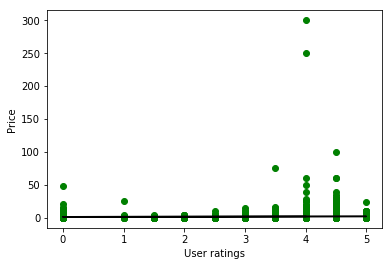

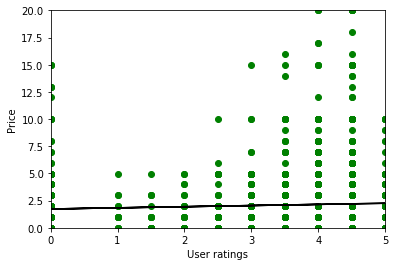

Intercept:  1.7311413328659
Coefficient:  [0.10541578]


In [121]:
linmod = LinearRegression()

XLinear = df[['user_rating']]
XLinear_train = XLinear[0:df_size]
XLinear_test = XLinear[df_size:]

fittedMod = linmod.fit(XLinear_train, Y_train)


preds = fittedMod.predict(XLinear_train)


plt.scatter(XLinear_train, Y_train,color='g')
plt.xlabel("User ratings")
plt.ylabel("Price")

plt.plot(XLinear_train, preds,color='k')
plt.show()


plt.scatter(XLinear_train, Y_train,color='g')
plt.xlim(0, 5.0)
plt.ylim(0, 20.0)
plt.xlabel("User ratings")
plt.ylabel("Price")

plt.plot(XLinear_train, preds,color='k')
plt.show()

print ("Intercept: ", fittedMod.intercept_)
print ("Coefficient: ", fittedMod.coef_)

According to the linear regression plot above, we can see that the price of the apps doesn't really increase depending on the user ratings.
In fact, the highest priced app, at $300, is rated 4/5.
Zooming in on the plot where the x axis is from the range 0 to 5, and the y values are from 0 to 20, we can see that the regression line starts at 1.73 when the x value is zero and has a small positive slope (0.105).

<a id='Multivariate'></a>
### Multivariate

training MSE: 58.0875352693976


Here are the coefficients of the model: 
size_bytes 3.420762576679527e-09
rating_count_tot -3.2888130068103993e-06
rating_count_ver -1.7064068915581268e-05
user_rating 0.2479520229600363
user_rating_ver -0.2185145673885587
sup_devices.num -0.13580958038415206
ipadSc_urls.num 0.14922624389819722
lang.num -0.021751997787293188
vpp_lic -1.3792311080486996
game_enab -5.551115123125783e-17
currency_USD 4.440892098500626e-16
cont_rating_12+ -0.1804616308752337
cont_rating_17+ -0.7845827430786761
cont_rating_4+ 0.6566921582818537
cont_rating_9+ 0.3083522156720559


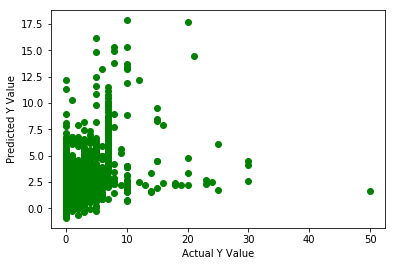

In [144]:
XMulti = df.drop(['price', 'track_name', 'ver', 'prime_genre'], axis=1)
XMulti = pd.get_dummies(XMulti)

XMulti_train = XMulti[0:df_size]
XMulti_test = XMulti[df_size:]

linmod = LinearRegression()

linmod.fit(XMulti_train, Y_train)

trainPreds = linmod.predict(XMulti_train)
train_mse = mean_squared_error(Y_train, trainPreds)
print('training MSE: %s\n\n' % train_mse)

coefs = linmod.coef_

print("Here are the coefficients of the model: ")
for i in range(len(coefs)):
    print(XMulti.columns[i], coefs[i])
    
testPreds = linmod.predict(XMulti_test)
plt.scatter(Y_test, testPreds,color='g')
plt.xlabel("Actual Y Value")
plt.ylabel("Predicted Y Value")
plt.show()

The coefficients of the model reveal that the increase or decrease in price changes for every unit increase of the feature multiplied by the coefficient.

In [145]:

rs = r2_score(Y_train, trainPreds)
print ("R-Squared value using the multivariate model on training data: ", rs)


train_mse = mean_squared_error(Y_train, trainPreds)
print("MSE using the multivariate model on train data: ", train_mse)
test_mse = mean_squared_error(Y_test, testPreds)
print("MSE using the multivariate model on test data: ", test_mse)


R-Squared value using the multivariate model on training data:  0.036535225978117536
MSE using the multivariate model on train data:  58.0875352693976
MSE using the multivariate model on test data:  7.296470346227767


When using multiple predictors, we can see the plot where we compare our predicted price vs the actual price. 
From the plot, it looks like our predictions aren't good -- for example, the actual y value of 10 has a  predicted y value of  ~1 to ~17.5, but there isn't a data point on 10 for our predicted Y value. Another data point where the actual Y value is 50, but our predicted Y value is 2.5.
Our R-squared value reveals that our model explains nearly none of the variability of the response data around its mean; so our model doesn't fit our data so well.
However, our MSE reveals that we have do not have an overfitting and do not have an underfitting since the MSE for our training data is lower than the MSE for our test data.

<a id='Feature'></a>
## Feature selection

So lets cut out some features and perform features subset selection to improve our model.

<a id='Subset'></a>
### Feature Subset Selection

In [153]:
X = df.drop(['price', 'track_name', 'ver'], axis=1)
Y = df['price']

X_train = X[0:df_size]
X_test = X[df_size:]


df.prime_genre = pd.factorize(df.prime_genre)[0]
df.cont_rating = pd.factorize(df.cont_rating)[0]
df.currency = pd.factorize(df.currency)[0]


selector = SelectPercentile(f_regression, percentile=50)
selector.fit_transform(X_train, Y_train)
selected_cols = selector.get_support()
selected_feas = X_train.columns.values[selected_cols]
print("These are the features that were selected:\n")
print(selected_feas)

These are the features that were selected:

['size_bytes' 'rating_count_tot' 'prime_genre' 'sup_devices.num'
 'ipadSc_urls.num' 'lang.num']


C:\Users\Henry\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Henry\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Henry\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Henry\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


We keep track_name and ver dropped since they aren't very useful, only for indexing or description purposes. 
We factorize prime_genre, cont_rating, and currency since they're continuous variables. Carrying out feature subset selection and using 50 as the percentile, the features that were selected are the size of the app, the total rating counts, the genre of the app, the number of devices the app can support, the number of screenshots it provides (the preview screenshots when you check out an app), and the number of languages the app supports. We'll try and carry on with our linear regression and see if the model improves.

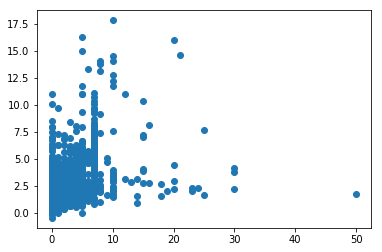

R-Squared value using 50%% of the features:  0.07290458135282318
The MSE using 50% of the features, and a linear regresion on the selected features is 6.882012913496914


In [158]:
X_sub_train = X_train[selected_feas]

X_sub_test = X_test[selected_feas] 

lm_sub = LinearRegression()
lm_sub.fit(X_sub_train, Y_train)
preds_sub = lm_sub.predict(X_sub_test)

plt.figure()
plt.scatter(Y_test, preds_sub)
plt.show()

rs = r2_score(Y_test, preds_sub)
print ("R-Squared value using 50%% of the features: ", rs)
mse_sub = mean_squared_error(Y_test, preds_sub)
print("The MSE using 50%% of the features, and a linear regresion on the selected features is %s" % mse_sub)

It first look, the scatterplot shows that our model hasn't improved and that there is a huge variance between our predicted Y values and the actual Y values. However, there is a slight improvement in the R-squared value and a lower MSE, but not enough to say that the model fits the data.

<a id='Lasso'></a>
### Lasso as regularization

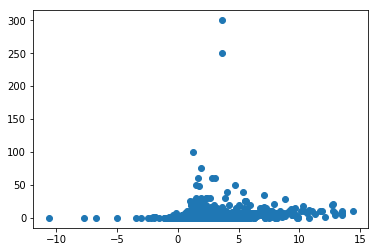

The MSE using cross validation and the Lasso on the entire dataset is 32.6253380431948


In [162]:
kf = KFold(n_splits=10)

preds_cv = []

for train, test in kf.split(X):
    X_cv = X.iloc[train]
    Y_cv = Y.iloc[train]
    
    X_cv_test = X.iloc[test]
    
    lm_cv = Lasso(max_iter=5000, tol=0.001)
    lm_cv.fit(X_cv, Y_cv)
    preds = lm_cv.predict(X_cv_test)
    preds_cv += list(preds)

plt.figure()
plt.scatter(preds_cv, Y)
plt.show()
mse_cv = mean_squared_error(Y,preds_cv)
print("The MSE using cross validation and the Lasso on the entire dataset is %s" % mse_cv)

Performing 10 fold cross validation and Lasso changed the plot considerably and shows an increased MSE.

<a id='Conclusion'></a>
## Conclusion

To conclude, I thought this would be mostly be similar to labs in which our models tend to fit and so representations are easier to analyze. The idea was to find general statistics, such as predicting the price of apps based on user ratings, but as I worked through models, the more interesting findsings were trying to fit the model to the data. The data contained lots of strings and continuous variables so workarounds took more time. The project focused on regression rather than classification and our evaluation metrics were MSE and R-squared since we were dealing with regression. 

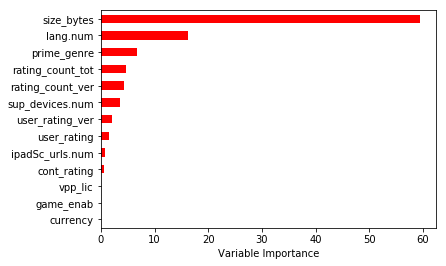

In [166]:
regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=20, random_state=1)
regr.fit(X_train, Y_train)

feature_importance = regr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Performing gradient boosting regression shows that the size of the app played a more signicant role than I expected (I expected user rating to play as the major factor of pricing an app). 

In [168]:
print("Coefficients of the model: ")
for i in range(len(coefs)):
    print(XMulti.columns[i], coefs[i])

Coefficients of the model: 
size_bytes 3.420762576679527e-09
rating_count_tot -3.2888130068103993e-06
rating_count_ver -1.7064068915581268e-05
user_rating 0.2479520229600363
user_rating_ver -0.2185145673885587
sup_devices.num -0.13580958038415206
ipadSc_urls.num 0.14922624389819722
lang.num -0.021751997787293188
vpp_lic -1.3792311080486996
game_enab -5.551115123125783e-17
currency_USD 4.440892098500626e-16
cont_rating_12+ -0.1804616308752337
cont_rating_17+ -0.7845827430786761
cont_rating_4+ 0.6566921582818537
cont_rating_9+ 0.3083522156720559


As for the prediction of the app price, we can see user rating and cont_rating_4+ has the highest coefficients, but considering size_bytes's slope increases by the bytes, it would make a larger impact for every unit increased. So to conclude, size_bytes ended up being the strongest predictor to the price of apps in the Apple iOS store.